<a href="https://colab.research.google.com/github/chouhandiksha/bigdataproject/blob/colab/notebooks/Extract%20and%20Clean%20New%20York%20Census%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract and Clean New York Census Data
**Instructions:**
1. Mount the google drive to access the data by following **Steps to Mount the Drive**.
2. Provide the drive file path to the data, the state FIPS code, the county FIPS code, and the 5 digit combined FIPS codes in the fourth code cell.

**Steps to Mount the Drive:**

1. Execute the second code cell.
2. There will be a link to follow in order to authorize the google account for drive. Go to that link.
3. A code to authorize the google account will be generated. Copy the code generated.
4. Go back to the cell where the process of mounting the drive is running. Paste the generated code from step 3 to the text box in the cell and press enter.

In [ ]:
pip install geopandas

In [2]:
import geopandas
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import altair as alt
from vega_datasets import data

# Allow altair to visualize large datasets
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

state_fips = '36'
county_fips = {'061', '047', '005', '085', '081'}
fips = ['36061','36047','36005','36085','36081']

source = Path('drive/MyDrive/big-data-project/data/unprocessed/census/safegraph_open_census_data/')
target = Path('drive/MyDrive/big-data-project/data/clean-data/')

Load file cbg_b01.csv from the SafeGraph Census data. 

The file contains data about population size and statistics related to race. 




| Column Name  | Description     |
| --------- | ------------------------------------------------------------ |
| B01003e1  | TOTAL POPULATION: Total: Total population  -- (Estimate)     |
| B01003m1  | TOTAL POPULATION: Total: Total population -- (Margin of Error) |
| B02001e1  | RACE: Total: Total population -- (Estimate)                  |
| B02001e10 | RACE: Two or more races: Two races excluding Some other race, and three  or more races: Total population -- (Estimate) |
| B02001e2  | RACE: White alone: Total population -- (Estimate)            |
| B02001e3  | RACE: Black or African American alone: Total population -- (Estimate) |
| B02001e4  | RACE: American Indian and Alaska Native alone: Total population --  (Estimate) |
| B02001e5  | RACE: Asian alone: Total population -- (Estimate)            |
| B02001e6  | RACE: Native Hawaiian and Other Pacific Islander alone: Total population  -- (Estimate) |
| B02001e7  | RACE: Some other race alone: Total population -- (Estimate)  |
| B02001e8  | RACE: Two or more races: Total population -- (Estimate)      |
| B02001e9  | RACE: Two or more races: Two races including Some other race: Total  population -- (Estimate) |
| B02001m1  | RACE: Total: Total population -- (Margin of Error)           |
| B02001m10 | RACE: Two or more races: Two races excluding Some other race, and three  or more races: Total population -- (Margin of Error) |
| B02001m2  | RACE: White alone: Total population -- (Margin of Error)     |
| B02001m3  | RACE: Black or African American alone: Total population -- (Margin of  Error) |
| B02001m4  | RACE: American Indian and Alaska Native alone: Total population --  (Margin of Error) |
| B02001m5  | RACE: Asian alone: Total population -- (Margin of Error)     |
| B02001m6  | RACE: Native Hawaiian and Other Pacific Islander alone: Total population  -- (Margin of Error) |
| B02001m7  | RACE: Some other race alone: Total population -- (Margin of Error) |
| B02001m8  | RACE: Two or more races: Total population -- (Margin of Error) |
| B02001m9  | RACE: Two or more races: Two races including Some other race: Total  population -- (Margin of Error) |
| B02008e1  | WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: White  alone or in combination with one or more other races -- (Estimate) |
| B02008m1  | WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: White  alone or in combination with one or more other races -- (Margin of Error) |
| B02009e1  | BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER  RACES: Total: Black or African American alone or in combination with one or  more other races -- (Estimate) |
| B02009m1  | BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER  RACES: Total: Black or African American alone or in combination with one or  more other races -- (Margin of Error) |
| B02010e1  | AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR  MORE OTHER RACES: Total: People who are American Indian or Alaska Native  alone or in combination with one or more other races -- (Estimate) |
| B02010m1  | AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR  MORE OTHER RACES: Total: People who are American Indian or Alaska Native  alone or in combination with one or more other races -- (Margin of Error) |
| B02011e1  | ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: Asian  alone or in combination with one or more other races -- (Estimate) |
| B02011m1  | ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: Asian  alone or in combination with one or more other races -- (Margin of Error) |
| B02012e1  | NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH  ONE OR MORE OTHER RACES: Total: Native Hawaiian and Other Pacific Islander  alone or in combination with one or more other races -- (Estimate) |
| B02012m1  | NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH  ONE OR MORE OTHER RACES: Total: Native Hawaiian and Other Pacific Islander  alone or in combination with one or more other races -- (Margin of Error) |
| B02013e1  | SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES:  Total: Some other race alone or in combination with one or more other races  -- (Estimate) |
| B02013m1  | SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES:  Total: Some other race alone or in combination with one or more other races  -- (Margin of Error) |
| B03002e1  | HISPANIC OR LATINO ORIGIN BY RACE: Total: Total population -- (Estimate) |
| B03002e10 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races including Some other race: Total population -- (Estimate) |
| B03002e11 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races excluding Some other race, and three or more races: Total  population -- (Estimate) |
| B03002e12 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Total population  -- (Estimate) |
| B03002e13 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: White alone: Total  population -- (Estimate) |
| B03002e14 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Black or African  American alone: Total population -- (Estimate) |
| B03002e15 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: American Indian  and Alaska Native alone: Total population -- (Estimate) |
| B03002e16 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Asian alone: Total  population -- (Estimate) |
| B03002e17 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Native Hawaiian  and Other Pacific Islander alone: Total population -- (Estimate) |
| B03002e18 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Some other race  alone: Total population -- (Estimate) |
| B03002e19 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Total population -- (Estimate) |
| B03002e2  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Total  population -- (Estimate) |
| B03002e20 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races including Some other race: Total population -- (Estimate) |
| B03002e21 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races excluding Some other race, and three or more races: Total  population -- (Estimate) |
| B03002e3  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: White alone:  Total population -- (Estimate) |
| B03002e4  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Black or  African American alone: Total population -- (Estimate) |
| B03002e5  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: American  Indian and Alaska Native alone: Total population -- (Estimate) |
| B03002e6  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Asian alone:  Total population -- (Estimate) |
| B03002e7  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Native  Hawaiian and Other Pacific Islander alone: Total population -- (Estimate) |
| B03002e8  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Some other  race alone: Total population -- (Estimate) |
| B03002e9  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Total population -- (Estimate) |
| B03002m1  | HISPANIC OR LATINO ORIGIN BY RACE: Total: Total population -- (Margin of  Error) |
| B03002m10 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races including Some other race: Total population -- (Margin of  Error) |
| B03002m11 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races excluding Some other race, and three or more races: Total  population -- (Margin of Error) |
| B03002m12 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Total population  -- (Margin of Error) |
| B03002m13 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: White alone: Total  population -- (Margin of Error) |
| B03002m14 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Black or African  American alone: Total population -- (Margin of Error) |
| B03002m15 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: American Indian  and Alaska Native alone: Total population -- (Margin of Error) |
| B03002m16 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Asian alone: Total  population -- (Margin of Error) |
| B03002m17 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Native Hawaiian  and Other Pacific Islander alone: Total population -- (Margin of Error) |
| B03002m18 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Some other race  alone: Total population -- (Margin of Error) |
| B03002m19 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Total population -- (Margin of Error) |
| B03002m2  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Total  population -- (Margin of Error) |
| B03002m20 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races including Some other race: Total population -- (Margin of Error) |
| B03002m21 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races excluding Some other race, and three or more races: Total  population -- (Margin of Error) |
| B03002m3  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: White alone:  Total population -- (Margin of Error) |
| B03002m4  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Black or  African American alone: Total population -- (Margin of Error) |
| B03002m5  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: American  Indian and Alaska Native alone: Total population -- (Margin of Error) |
| B03002m6  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Asian alone:  Total population -- (Margin of Error) |
| B03002m7  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Native  Hawaiian and Other Pacific Islander alone: Total population -- (Margin of  Error) |
| B03002m8  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Some other  race alone: Total population -- (Margin of Error) |
| B03002m9  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Total population -- (Margin of Error) |
| B03003e1  | HISPANIC OR LATINO ORIGIN: Total: Total population -- (Estimate) |
| B03003e2  | HISPANIC OR LATINO ORIGIN: Not Hispanic or Latino: Total population --  (Estimate) |
| B03003e3  | HISPANIC OR LATINO ORIGIN: Hispanic or Latino: Total population --  (Estimate) |
| B03003m1  | HISPANIC OR LATINO ORIGIN: Total: Total population -- (Margin of Error) |
| B03003m2  | HISPANIC OR LATINO ORIGIN: Not Hispanic or Latino: Total population --  (Margin of Error) |
| B03003m3  | HISPANIC OR LATINO ORIGIN: Hispanic or Latino: Total population --  (Margin of Error) |

Load File with total population for our census block groups.

In [5]:
# Read file
df = pd.read_csv(source/'data/cbg_b01.csv', dtype={'census_block_group': object})
df

census_block_group  B01001e1  B01001m1  ...  B01002Im3  B01003e1  B01003m1
0            010010201001       745       226  ...        NaN       745       226
1            010010201002      1265       232  ...        NaN      1265       232
2            010010202001       960       261  ...        NaN       960       261
3            010010202002      1236       227  ...        NaN      1236       227
4            010010203001      2364       378  ...       15.6      2364       378
...                   ...       ...       ...  ...        ...       ...       ...
220328       721537506011       921       332  ...       29.6       921       332
220329       721537506012      2703       531  ...        7.6      2703       531
220330       721537506013      1195       425  ...       22.8      1195       425
220331       721537506021      2005       471  ...        7.7      2005       471
220332       721537506022       736       371  ...        9.2       736       371

[220333 rows x 161 columns]

Extract all census block groups starting with 36061, 36047, 36005, 36085, and 36081.
36 is the New York state FIPs code. The final three digits are the county FIPS codes for New York County, Kings County, Bronx County, Richmond County, and Queens County respectively.  

In [6]:
# Function to filter out NY FIPS
def get_ny(df):
    return df[df['census_block_group'].astype(str).str[:5].isin(fips)]

In [7]:
# Filter out NY CBGs
df = get_ny(df)
df

census_block_group  B01001e1  B01001m1  ...  B01002Im3  B01003e1  B01003m1
127969       360050001000         0        11  ...        NaN         0        11
127970       360050001001      7503       365  ...        6.2      7503       365
127971       360050002000         0        11  ...        NaN         0        11
127972       360050002001      2114       488  ...       19.5      2114       488
127973       360050002002      2168       607  ...        9.3      2168       607
...                   ...       ...       ...  ...        ...       ...       ...
140118       360850319022      1293       395  ...        9.5      1293       395
140119       360850319023      1311       414  ...        8.4      1311       414
140120       360850323000         0        11  ...        NaN         0        11
140121       360850323001      1218       112  ...       12.4      1218       112
140122       360859901000         0        11  ...        NaN         0        11

[6493 rows x 161 columns]

In [8]:
'We have {} Census Block Groups'.format(len(df.index))

'We have 6493 Census Block Groups'

Extract the total population for each census block group, which is under column B01003e1.

In [9]:
# Select column
df = df[['census_block_group','B01003e1']]
df = df.rename(columns={'census_block_group':'cbg', 'B01003e1':'pop_total'})
df = df.set_index('cbg')
df = df
df

pop_total
cbg                    
360050001000          0
360050001001       7503
360050002000          0
360050002001       2114
360050002002       2168
...                 ...
360850319022       1293
360850319023       1311
360850323000          0
360850323001       1218
360859901000          0

[6493 rows x 1 columns]

Load the file with the race stats

In [10]:
alt.Chart(df, title='New York Metro Area CBG Population Histogram').mark_bar().encode(
    x=alt.X('pop_total:Q', bin=alt.Bin(maxbins=20), title='Total CBG Population'),
    y="count()"
).interactive()

alt.Chart(...)

![ny-pop-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/ny-pop-hist.png)

In [11]:
# Read file
df = pd.read_csv(source/'data/cbg_b02.csv', dtype={'census_block_group': object})
df

census_block_group  B02001e1  B02001m1  ...  C02003m18  C02003e19  C02003m19
0            010010201001       745       226  ...         11          0         11
1            010010201002      1265       232  ...         11          0         11
2            010010202001       960       261  ...         11          0         11
3            010010202002      1236       227  ...         11          0         11
4            010010203001      2364       378  ...         11          0         11
...                   ...       ...       ...  ...        ...        ...        ...
220328       721537506011       921       332  ...         13          0         13
220329       721537506012      2703       531  ...         13          0         13
220330       721537506013      1195       425  ...         13          0         13
220331       721537506021      2005       471  ...         13          0         13
220332       721537506022       736       371  ...         13          0         13

[220333 rows x 71 columns]

In [12]:
# Filter out NY CBGs
df = get_ny(df)
df

census_block_group  B02001e1  B02001m1  ...  C02003m18  C02003e19  C02003m19
127969       360050001000         0        11  ...         11          0         11
127970       360050001001      7503       365  ...         16          0         16
127971       360050002000         0        11  ...         11          0         11
127972       360050002001      2114       488  ...         11          0         11
127973       360050002002      2168       607  ...         23          0         11
...                   ...       ...       ...  ...        ...        ...        ...
140118       360850319022      1293       395  ...         11         16         24
140119       360850319023      1311       414  ...         11          0         11
140120       360850323000         0        11  ...         11          0         11
140121       360850323001      1218       112  ...         11          0         11
140122       360859901000         0        11  ...         11          0         11

[6493 rows x 71 columns]

In [13]:
# Get white only population
df = df[['census_block_group','B02001e1','B02001e2']]
df = df.rename(columns={'census_block_group':'cbg','B02001e1':'pop_total','B02001e2':'pop_whiteonly' })
df = df.set_index('cbg')
df

pop_total  pop_whiteonly
cbg                                   
360050001000          0              0
360050001001       7503            933
360050002000          0              0
360050002001       2114            758
360050002002       2168           1042
...                 ...            ...
360850319022       1293            370
360850319023       1311            486
360850323000          0              0
360850323001       1218            495
360859901000          0              0

[6493 rows x 2 columns]

In [14]:
# Calculate percentage
df['perc_whiteonly']= df.apply(lambda row: row['pop_whiteonly']/row['pop_total']*100 if row['pop_total']!=0 else 0, axis=1)
df

pop_total  pop_whiteonly  perc_whiteonly
cbg                                                   
360050001000          0              0        0.000000
360050001001       7503            933       12.435026
360050002000          0              0        0.000000
360050002001       2114            758       35.856197
360050002002       2168           1042       48.062731
...                 ...            ...             ...
360850319022       1293            370       28.615623
360850319023       1311            486       37.070938
360850323000          0              0        0.000000
360850323001       1218            495       40.640394
360859901000          0              0        0.000000

[6493 rows x 3 columns]

In [15]:
# Get top 3 CBG with highest whiteonly percentage
df.nlargest(3, 'perc_whiteonly')

pop_total  pop_whiteonly  perc_whiteonly
cbg                                                   
360050093001         24             24           100.0
360050274022        734            734           100.0
360050323003         83             83           100.0

In [16]:
# Get top 3 CBG with lowest whiteonly percentage
df.nsmallest(3, 'perc_whiteonly')

pop_total  pop_whiteonly  perc_whiteonly
cbg                                                   
360050001000          0              0             0.0
360050002000          0              0             0.0
360050004000          0              0             0.0

In [17]:
# unique variable for join later
race_df = df 
race_df

pop_total  pop_whiteonly  perc_whiteonly
cbg                                                   
360050001000          0              0        0.000000
360050001001       7503            933       12.435026
360050002000          0              0        0.000000
360050002001       2114            758       35.856197
360050002002       2168           1042       48.062731
...                 ...            ...             ...
360850319022       1293            370       28.615623
360850319023       1311            486       37.070938
360850323000          0              0        0.000000
360850323001       1218            495       40.640394
360859901000          0              0        0.000000

[6493 rows x 3 columns]

In [18]:
alt.Chart(race_df, title='New York Metro Area CBG Percentage White Only Histogram').mark_bar().encode(
    x=alt.X('perc_whiteonly:Q', bin=alt.Bin(maxbins=20), title='CBG Percentage White Only'),
    y="count()"
).interactive()

alt.Chart(...)

![ny-wh-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/ny-wh-hist.png)

# Get Poverty Stats


| Column Name | Description |
| -------- | ------------------------------------------------------------ |
| C17002e1 | RATIO OF INCOME TO POVERTY LEVEL IN THE  PAST 12 MONTHS: Total: Population for whom poverty status is determined --  (Estimate) |
| C17002e2 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: Under .50:  Population for whom poverty status is determined -- (Estimate) |
| C17002e3 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: .50 to .99:  Population for whom poverty status is determined -- (Estimate) |
| C17002e4 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.00 to 1.24:  Population for whom poverty status is determined -- (Estimate) |
| C17002e5 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.25 to 1.49:  Population for whom poverty status is determined -- (Estimate) |
| C17002e6 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.50 to 1.84:  Population for whom poverty status is determined -- (Estimate) |
| C17002e7 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.85 to 1.99:  Population for whom poverty status is determined -- (Estimate) |
| C17002e8 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 2.00 and over:  Population for whom poverty status is determined -- (Estimate) |






In [19]:
# Read file 
df = pd.read_csv(source/'data/cbg_c17.csv', dtype={'census_block_group': object})
df

census_block_group  C17002e1  C17002m1  ...  B17021m34  B17021e35  B17021m35
0            010010201001       745       226  ...         12         22         27
1            010010201002      1265       232  ...         11          6          9
2            010010202001       955       259  ...         11         10         14
3            010010202002      1059       214  ...          9          7         10
4            010010203001      2364       378  ...         35         19         23
...                   ...       ...       ...  ...        ...        ...        ...
220328       721537506011       921       332  ...         13          0         13
220329       721537506012      2703       531  ...         13          0         13
220330       721537506013      1195       425  ...         13          0         13
220331       721537506021      1990       466  ...         13          0         13
220332       721537506022       736       371  ...         13          0         13

[220333 rows x 297 columns]

In [20]:
# Filter out new york CBGs
df = get_ny(df)
df

census_block_group  C17002e1  C17002m1  ...  B17021m34  B17021e35  B17021m35
127969       360050001000         0        11  ...         11          0         11
127970       360050001001         0        16  ...         16          0         16
127971       360050002000         0        11  ...         11          0         11
127972       360050002001      2114       488  ...         11          0         11
127973       360050002002      2168       607  ...         22         14         22
...                   ...       ...       ...  ...        ...        ...        ...
140118       360850319022      1293       395  ...         48         68         56
140119       360850319023      1311       414  ...         11          1          2
140120       360850323000         0        11  ...         11          0         11
140121       360850323001      1218       112  ...         11          0         11
140122       360859901000         0        11  ...         11          0         11

[6493 rows x 297 columns]

In [21]:
# Select columns
df = df[['census_block_group', 'C17002e1', 'C17002e2', 'C17002e3']]
df = df.rename(columns={'census_block_group':'cbg', 'C17002e1':'pov_pop_all'})
df = df.set_index('cbg')
df

pov_pop_all  C17002e2  C17002e3
cbg                                          
360050001000            0         0         0
360050001001            0         0         0
360050002000            0         0         0
360050002001         2114       285        56
360050002002         2168       209       201
...                   ...       ...       ...
360850319022         1293       332        51
360850319023         1311       354       238
360850323000            0         0         0
360850323001         1218       238        38
360859901000            0         0         0

[6493 rows x 3 columns]

In [22]:
# Add row values together
df['pop_poverty'] = df.apply(lambda row: row['C17002e2']+row['C17002e3'], axis=1)
df

pov_pop_all  C17002e2  C17002e3  pop_poverty
cbg                                                       
360050001000            0         0         0            0
360050001001            0         0         0            0
360050002000            0         0         0            0
360050002001         2114       285        56          341
360050002002         2168       209       201          410
...                   ...       ...       ...          ...
360850319022         1293       332        51          383
360850319023         1311       354       238          592
360850323000            0         0         0            0
360850323001         1218       238        38          276
360859901000            0         0         0            0

[6493 rows x 4 columns]

In [23]:
# Calculate percentage
df['poverty_percentage'] = df.apply(lambda row: row['pop_poverty']/row['pov_pop_all']*100 if row['pov_pop_all'] != 0 else 0, axis=1)
df

pov_pop_all  C17002e2  C17002e3  pop_poverty  poverty_percentage
cbg                                                                           
360050001000            0         0         0            0            0.000000
360050001001            0         0         0            0            0.000000
360050002000            0         0         0            0            0.000000
360050002001         2114       285        56          341           16.130558
360050002002         2168       209       201          410           18.911439
...                   ...       ...       ...          ...                 ...
360850319022         1293       332        51          383           29.621036
360850319023         1311       354       238          592           45.156369
360850323000            0         0         0            0            0.000000
360850323001         1218       238        38          276           22.660099
360859901000            0         0         0            0            0.000000

[6493 rows x 5 columns]

In [24]:
# Select Column
df = df[['poverty_percentage']]
df

poverty_percentage
cbg                             
360050001000            0.000000
360050001001            0.000000
360050002000            0.000000
360050002001           16.130558
360050002002           18.911439
...                          ...
360850319022           29.621036
360850319023           45.156369
360850323000            0.000000
360850323001           22.660099
360859901000            0.000000

[6493 rows x 1 columns]

In [25]:
# Preview largest
df.nlargest(3, 'poverty_percentage')

poverty_percentage
cbg                             
360470013002           94.600675
360610240001           89.676531
360810849004           87.337058

In [26]:
# Preview smallest
df.nsmallest(3, 'poverty_percentage')

poverty_percentage
cbg                             
360050001000                 0.0
360050001001                 0.0
360050002000                 0.0

In [27]:
pov_df = df

In [28]:
alt.Chart(pov_df, title='New York Metro Area CBG Percentage of Population in Poverty Histogram').mark_bar().encode(
    x=alt.X('poverty_percentage:Q', bin=alt.Bin(maxbins=20), title='CBG Percentage of Population in Poverity'),
    y="count()"
).interactive()

alt.Chart(...)

![ny-pov-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/ny-pov-hist.png)

In [29]:
# Read geojson for ALL US
# WARNING TAKES A LONG TIME
gdf = geopandas.read_file(source/'geometry/cbg.geojson')
gdf

StateFIPS  ...                                           geometry
0             01  ...  MULTIPOLYGON (((-85.37282 32.63424, -85.37275 ...
1             01  ...  MULTIPOLYGON (((-85.38346 32.64838, -85.38301 ...
2             01  ...  MULTIPOLYGON (((-85.37139 32.60139, -85.37138 ...
3             01  ...  MULTIPOLYGON (((-86.64797 33.59205, -86.64771 ...
4             01  ...  MULTIPOLYGON (((-86.65206 33.59869, -86.65204 ...
...          ...  ...                                                ...
220328        72  ...  MULTIPOLYGON (((-65.86850 18.18426, -65.86836 ...
220329        72  ...  MULTIPOLYGON (((-65.87053 18.17034, -65.87040 ...
220330        72  ...  MULTIPOLYGON (((-65.87678 18.17519, -65.87656 ...
220331        72  ...  MULTIPOLYGON (((-65.88054 18.15797, -65.87998 ...
220332        72  ...  MULTIPOLYGON (((-65.88778 18.15440, -65.88777 ...

[220333 rows x 9 columns]

In [30]:
# Filter by state FIPS
gdf = gdf[gdf.apply(lambda r: True if r['StateFIPS']==state_fips else False, axis=1)]
gdf

StateFIPS  ...                                           geometry
127690        36  ...  MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ...
127691        36  ...  MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ...
127692        36  ...  MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ...
127693        36  ...  MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ...
127694        36  ...  MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ...
...          ...  ...                                                ...
143148        36  ...  MULTIPOLYGON (((-76.66790 43.00730, -76.66747 ...
143149        36  ...  MULTIPOLYGON (((-76.61199 43.00957, -76.60329 ...
143150        36  ...  MULTIPOLYGON (((-76.55245 42.92640, -76.55029 ...
143151        36  ...  MULTIPOLYGON (((-76.43020 42.77944, -76.42203 ...
143152        36  ...  MULTIPOLYGON (((-76.68823 42.96846, -76.68388 ...

[15463 rows x 9 columns]

In [31]:
# Filter by county FIPS
gdf = gdf[gdf.apply(lambda r: True if r['CountyFIPS'] in county_fips else False, axis=1)]
gdf

StateFIPS  ...                                           geometry
127690        36  ...  MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ...
127691        36  ...  MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ...
127692        36  ...  MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ...
127693        36  ...  MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ...
127694        36  ...  MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ...
...          ...  ...                                                ...
143120        36  ...  MULTIPOLYGON (((-74.08465 40.61520, -74.08405 ...
143121        36  ...  MULTIPOLYGON (((-74.08103 40.61328, -74.08056 ...
143122        36  ...  MULTIPOLYGON (((-74.07382 40.58045, -74.06953 ...
143123        36  ...  MULTIPOLYGON (((-74.06180 40.59235, -74.05969 ...
143124        36  ...  MULTIPOLYGON (((-74.09430 40.56302, -74.09132 ...

[6493 rows x 9 columns]

In [32]:
# Write filtered geojson file to disc
gdf.to_file(target/'ny/ny.geojson', driver='GeoJSON')

In [33]:
# Read geojson file
gdf = geopandas.read_file(target/'ny/ny.geojson')
gdf

StateFIPS  ...                                           geometry
0           36  ...  MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ...
1           36  ...  MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ...
2           36  ...  MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ...
3           36  ...  MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ...
4           36  ...  MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ...
...        ...  ...                                                ...
6488        36  ...  MULTIPOLYGON (((-74.08465 40.61520, -74.08405 ...
6489        36  ...  MULTIPOLYGON (((-74.08103 40.61328, -74.08056 ...
6490        36  ...  MULTIPOLYGON (((-74.07382 40.58045, -74.06953 ...
6491        36  ...  MULTIPOLYGON (((-74.06180 40.59235, -74.05969 ...
6492        36  ...  MULTIPOLYGON (((-74.09430 40.56302, -74.09132 ...

[6493 rows x 9 columns]

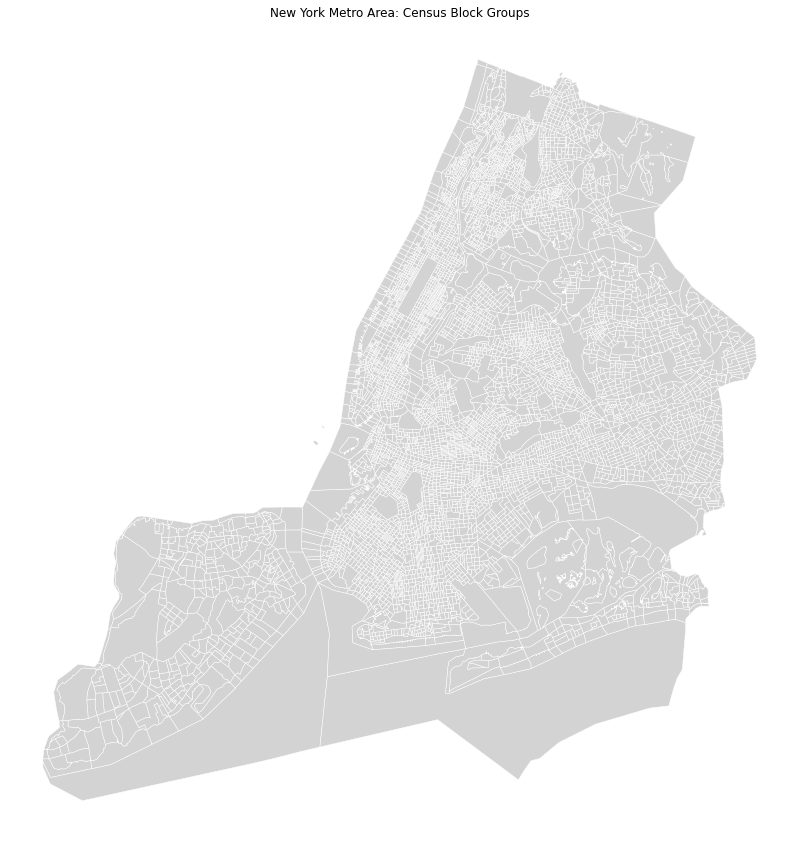

In [34]:
# Preview map
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('New York Metro Area: Census Block Groups')
ax.axis('off')
gdf.plot(ax=ax, facecolor="lightgray", edgecolor="white", lw=0.5);

In [35]:
# simplify column name
gdf = gdf.rename(columns={'CensusBlockGroup':'cbg'})
gdf

StateFIPS  ...                                           geometry
0           36  ...  MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ...
1           36  ...  MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ...
2           36  ...  MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ...
3           36  ...  MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ...
4           36  ...  MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ...
...        ...  ...                                                ...
6488        36  ...  MULTIPOLYGON (((-74.08465 40.61520, -74.08405 ...
6489        36  ...  MULTIPOLYGON (((-74.08103 40.61328, -74.08056 ...
6490        36  ...  MULTIPOLYGON (((-74.07382 40.58045, -74.06953 ...
6491        36  ...  MULTIPOLYGON (((-74.06180 40.59235, -74.05969 ...
6492        36  ...  MULTIPOLYGON (((-74.09430 40.56302, -74.09132 ...

[6493 rows x 9 columns]

In [36]:
# set index for join
gdf = gdf.set_index('cbg')
gdf

StateFIPS  ...                                           geometry
cbg                     ...                                                   
360050175002        36  ...  MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ...
360050141001        36  ...  MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ...
360050145001        36  ...  MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ...
360050075002        36  ...  MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ...
360050418001        36  ...  MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ...
...                ...  ...                                                ...
360850040003        36  ...  MULTIPOLYGON (((-74.08465 40.61520, -74.08405 ...
360850040005        36  ...  MULTIPOLYGON (((-74.08103 40.61328, -74.08056 ...
360850070000        36  ...  MULTIPOLYGON (((-74.07382 40.58045, -74.06953 ...
360850074000        36  ...  MULTIPOLYGON (((-74.06180 40.59235, -74.05969 ...
360850112020        36  ...  MULTIPOLYGON (((-74.09430 40.56302, -74.09132 ...

[6493 rows x 8 columns]

In [37]:
gdf = gdf.merge(race_df, left_index=True, right_index=True)
gdf

StateFIPS CountyFIPS  ... pop_whiteonly perc_whiteonly
cbg                                ...                             
360050175002        36        005  ...           164      14.774775
360050141001        36        005  ...           277      19.169550
360050145001        36        005  ...           171       8.537194
360050075002        36        005  ...           124       4.540461
360050418001        36        005  ...            85       9.081197
...                ...        ...  ...           ...            ...
360850040003        36        085  ...           414      15.016322
360850040005        36        085  ...           431      45.464135
360850070000        36        085  ...             0       0.000000
360850074000        36        085  ...             0       0.000000
360850112020        36        085  ...             0       0.000000

[6493 rows x 11 columns]

In [38]:
gdf = gdf.merge(pov_df, left_index=True, right_index=True)
gdf

StateFIPS CountyFIPS  ... perc_whiteonly poverty_percentage
cbg                                ...                                  
360050175002        36        005  ...      14.774775          55.225225
360050141001        36        005  ...      19.169550          36.747405
360050145001        36        005  ...       8.537194          39.476678
360050075002        36        005  ...       4.540461          22.812157
360050418001        36        005  ...       9.081197          18.859649
...                ...        ...  ...            ...                ...
360850040003        36        085  ...      15.016322          40.007254
360850040005        36        085  ...      45.464135           0.000000
360850070000        36        085  ...       0.000000           0.000000
360850074000        36        085  ...       0.000000           0.000000
360850112020        36        085  ...       0.000000           0.000000

[6493 rows x 12 columns]

In [39]:
# Write filtered geojson file to disc
gdf.to_file(target/'ny/ny_census.geojson', driver='GeoJSON')

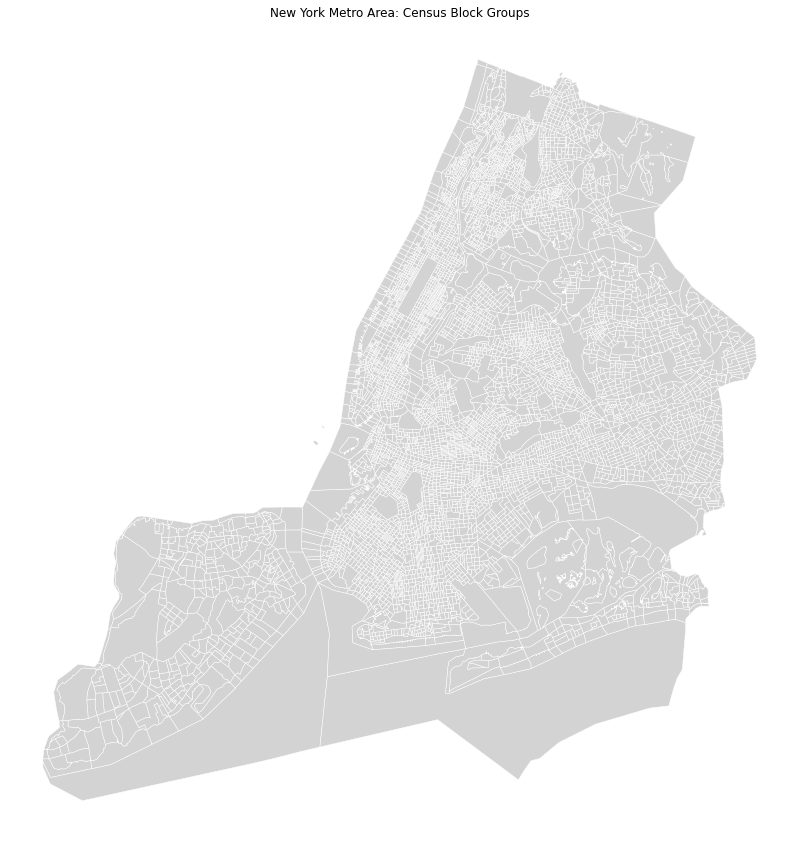

In [40]:
# Preview map
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('New York Metro Area: Census Block Groups')
ax.axis('off')
gdf.plot(ax=ax, facecolor="lightgray", edgecolor="white", lw=0.5);

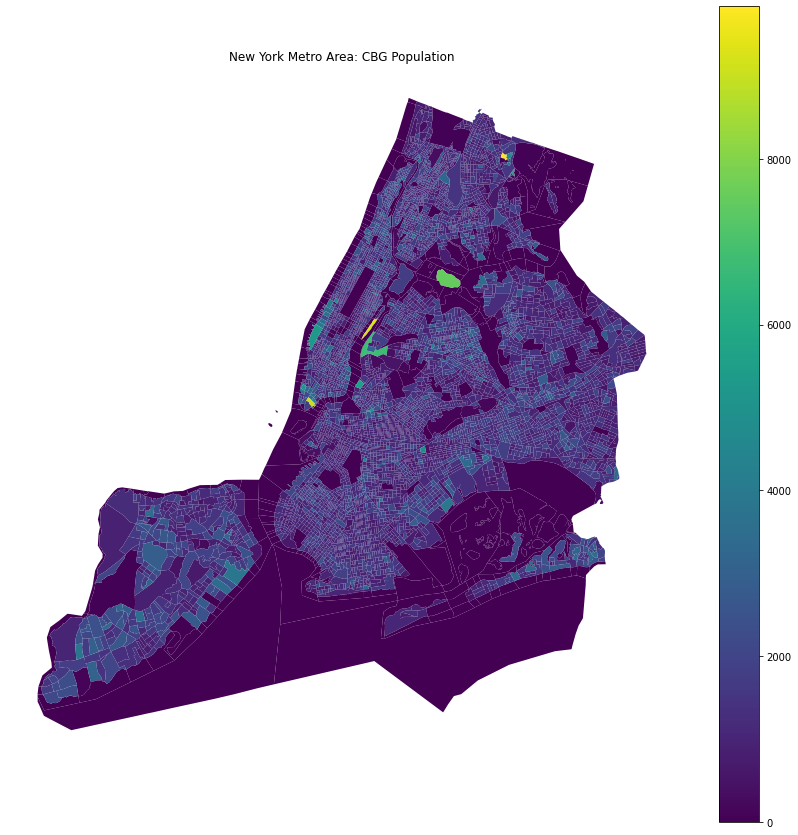

In [41]:
# Plot population size
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('New York Metro Area: CBG Population')
ax.axis('off')
gdf.plot(column='pop_total', ax=ax, legend=True);

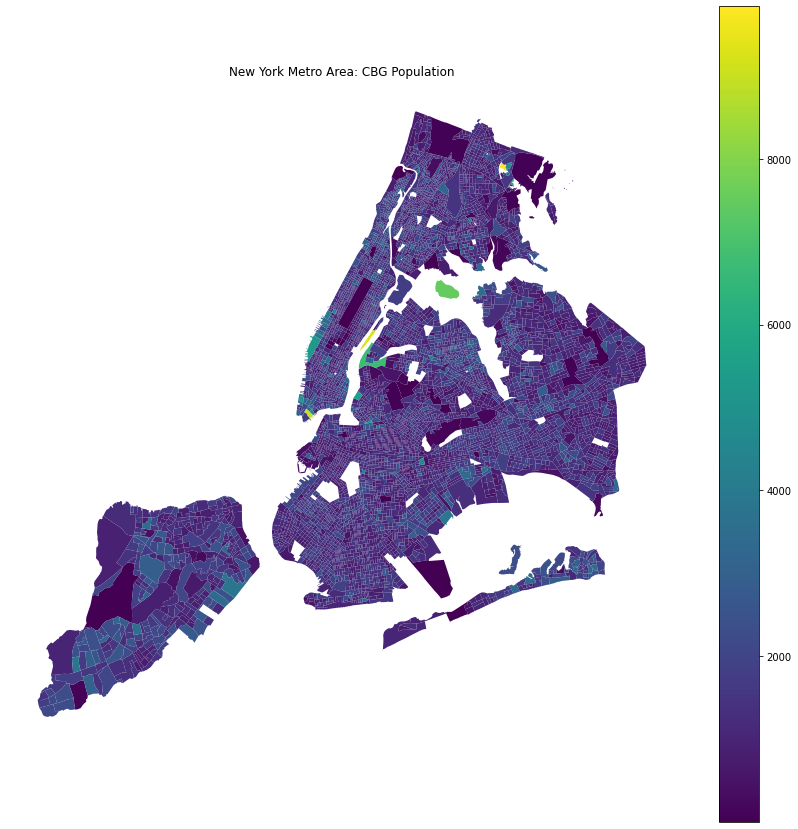

In [42]:
# Pop where not 0
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('New York Metro Area: CBG Population')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='pop_total', ax=ax, legend=True)

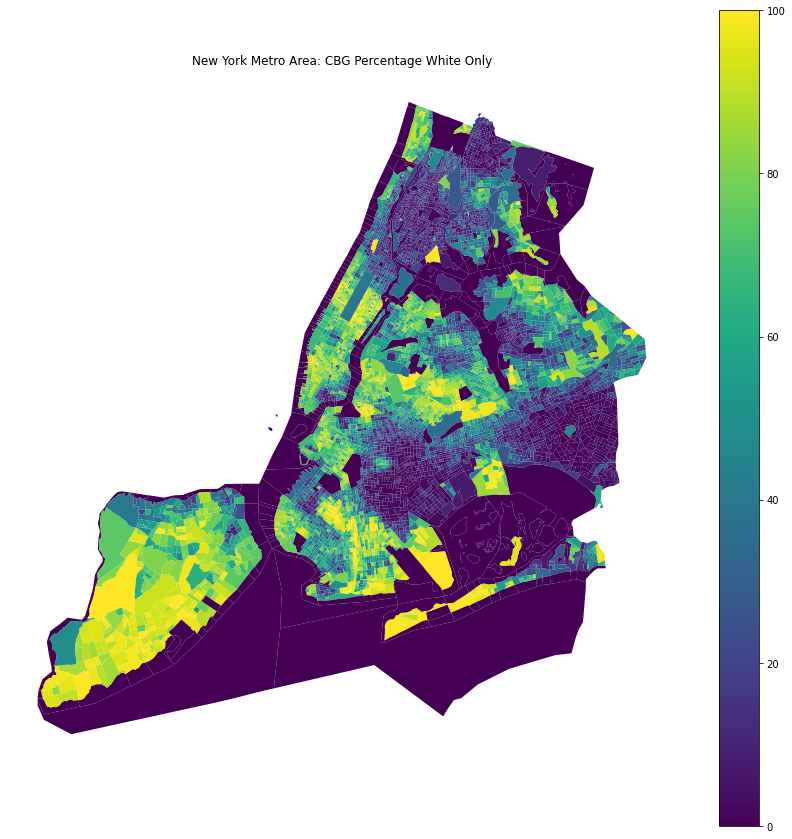

In [43]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('New York Metro Area: CBG Percentage White Only')
ax.axis('off')
gdf.plot(column='perc_whiteonly', ax=ax, legend=True);

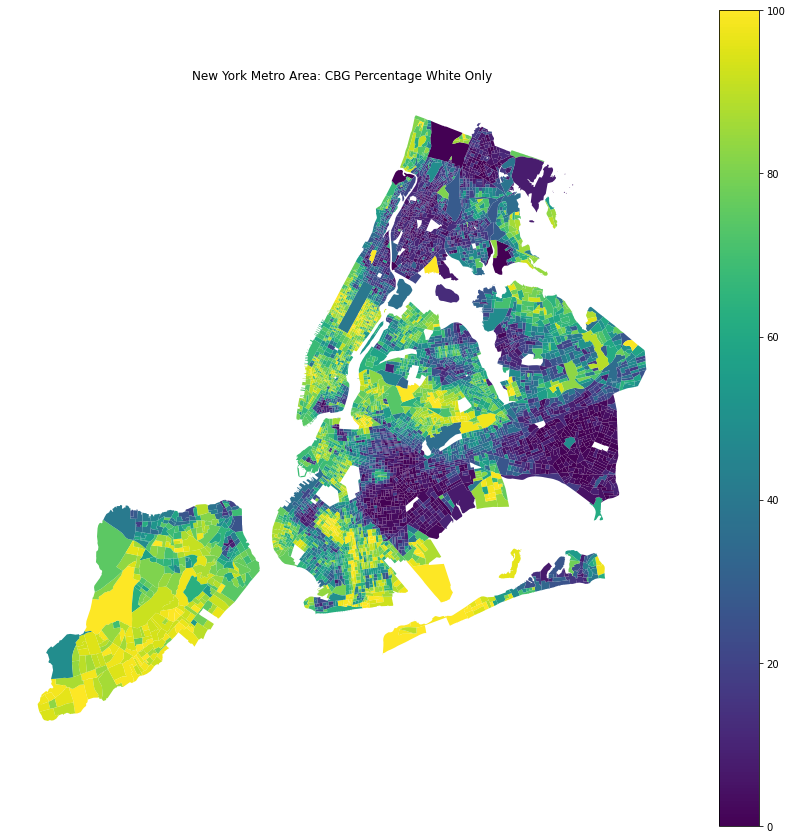

In [44]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('New York Metro Area: CBG Percentage White Only')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='perc_whiteonly', ax=ax, legend=True)

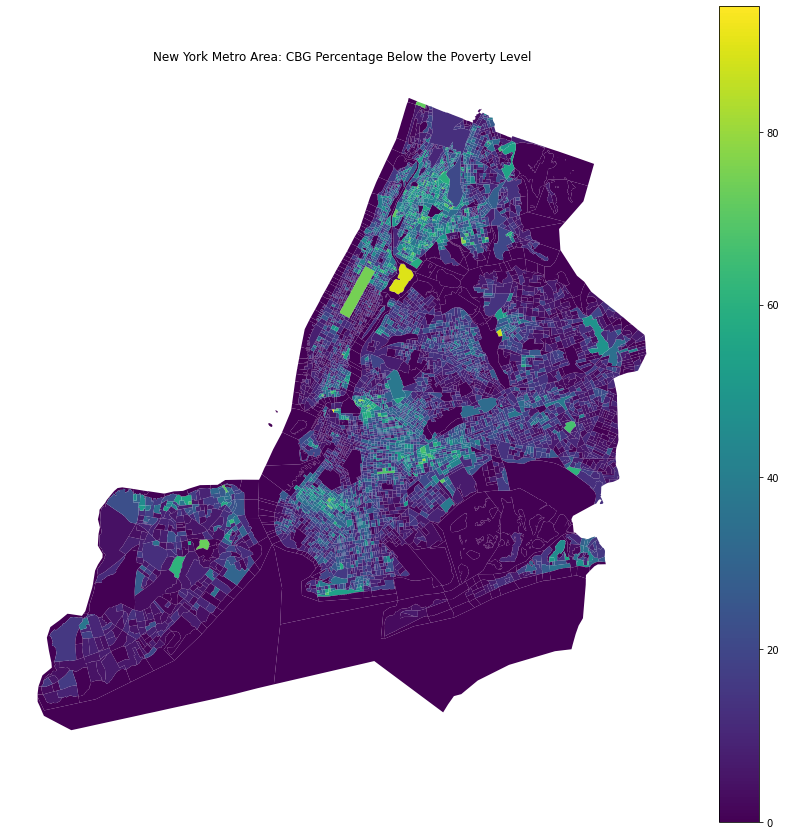

In [45]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('New York Metro Area: CBG Percentage Below the Poverty Level')
ax.axis('off')
gdf.plot(column='poverty_percentage', ax=ax, legend=True);

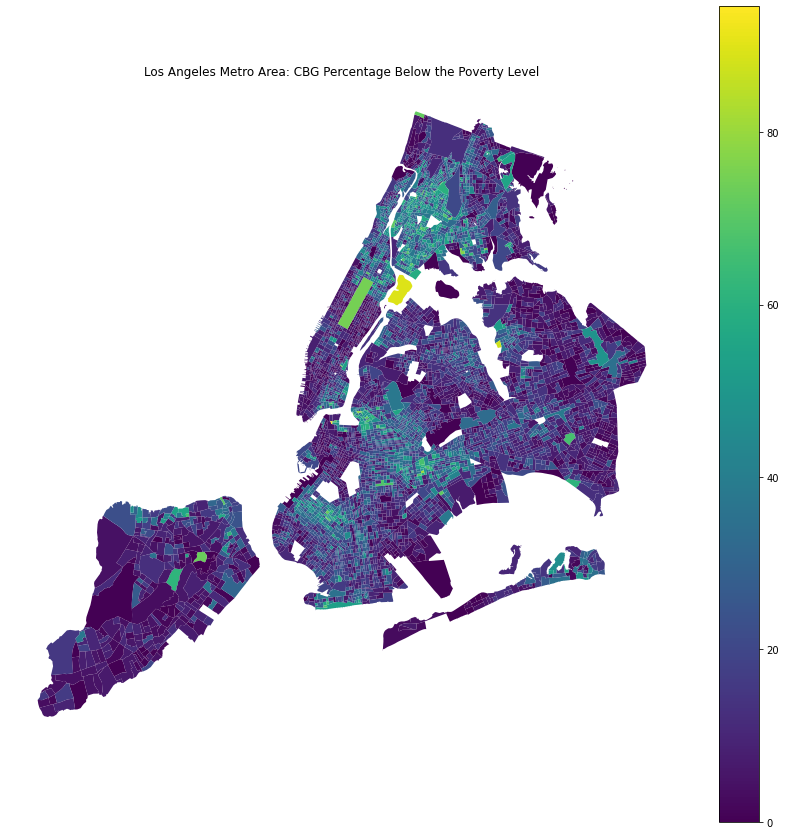

In [46]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: CBG Percentage Below the Poverty Level')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='poverty_percentage', ax=ax, legend=True);

In [47]:
# Extract stats to save
stats_df = gdf[['pop_total','poverty_percentage','perc_whiteonly']]
stats_df

pop_total  poverty_percentage  perc_whiteonly
cbg                                                        
360050175002       1110           55.225225       14.774775
360050141001       1445           36.747405       19.169550
360050145001       2003           39.476678        8.537194
360050075002       2731           22.812157        4.540461
360050418001        936           18.859649        9.081197
...                 ...                 ...             ...
360850040003       2757           40.007254       15.016322
360850040005        948            0.000000       45.464135
360850070000          0            0.000000        0.000000
360850074000          0            0.000000        0.000000
360850112020          0            0.000000        0.000000

[6493 rows x 3 columns]

In [48]:
if len(set(stats_df.index)) == len(stats_df.index):
    print('Everything is good, every Row has a unique CBG!')
else:
    print('We have a problem, not every row uas a unique CBG.')

Everything is good, every Row has a unique CBG!


In [49]:
for col in stats_df.columns:
    print('\n')
    print(col)
    print('Min: {}\nMax: {}'.format(stats_df[col].min(), stats_df[col].max()))



pop_total
Min: 0
Max: 9838


poverty_percentage
Min: 0.0
Max: 94.60067491563554


perc_whiteonly
Min: 0.0
Max: 100.0


In [50]:
# Print all Null and NaN values
print('We have {} null values.'.format(len(stats_df[stats_df.isna().any(axis=1)])))

We have 0 null values.


In [51]:
# Write stats to disc
filename = target/'ny/ny.csv'
stats_df.to_csv(filename)